# Exploración base de datos el algoritmo es correcto

## Exploración base de datos y feature engineering

### Carga de datos y paquetes

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import warnings
import os

In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
train = pd.read_csv("train_data.csv")
val = pd.read_csv("test_data.csv")

In [4]:
train.head(3)

,id,area,ascensor,balcon,banos,banoservicio,conjuntocerrado,cuartoservicio,deposito,estrato,...,tiempodeconstruido,vigilancia,vista,zonalavanderia,valoradministracion,valorventa,tipoinmueble,tiponegocio,latitud,longitud
0,1205404,55.0,NaN,NaN,NaN,NaN,0,NaN,1.0,3.0,...,NaN,NaN,NaN,1.0,50000.0,1.699500e+08,Casa,Venta,4.560965,-74.094889
1,1204371,43.0,NaN,NaN,NaN,NaN,0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,0.0,9.000000e+07,Casa,Venta,4.576960,-74.100083
2,1125353,360.0,NaN,NaN,NaN,NaN,0,NaN,0.0,3.0,...,NaN,NaN,NaN,NaN,0.0,1.100000e+09,Casa,Venta,4.575000,-74.101000


Los _NA_ parecen estar en consonancia con la ausencia del atributo. Entonces reemplazamos por cero.

In [5]:
train= train.fillna(0)

In [6]:
val= val.fillna(0)

In [7]:
train.tail(3)

,id,area,ascensor,balcon,banos,banoservicio,conjuntocerrado,cuartoservicio,deposito,estrato,...,tiempodeconstruido,vigilancia,vista,zonalavanderia,valoradministracion,valorventa,tipoinmueble,tiponegocio,latitud,longitud
244485,6262943,235.0,0.0,0.0,4.0,0.0,0,1.0,0.0,4.0,...,Más de 20 años,0.0,0,1.0,0.0,752561771.0,Casa,Venta,4.736392,-74.040659
244486,6262944,232.0,0.0,0.0,4.0,0.0,0,1.0,0.0,4.0,...,Más de 20 años,0.0,0,1.0,0.0,704942538.0,Casa,Venta,4.737524,-74.040292
244487,6262945,237.0,0.0,0.0,4.0,0.0,0,1.0,0.0,5.0,...,Entre 10 y 20 años,0.0,Exterior,1.0,0.0,934932308.0,Casa,Venta,4.702653,-74.058467


### Variable valor venta

Realizamos una descripción de la variable _valor venta_, que es una de las variables importantes en la construcción de la variable de interés.

In [8]:
train.valorventa.describe()

count    2.444880e+05
mean     9.750223e+09
std      2.464129e+12
min      5.300000e+07
25%      3.000000e+08
50%      5.004635e+08
75%      9.000000e+08
max      1.000000e+15
Name: valorventa, dtype: float64

Observamos que el valor máximo es una cifra astronómica comparada con los demas, incluso con el percentil 75, por lo que eliminaremos los datos por encima del percentil 99

In [9]:
train = train[train.valorventa<np.percentile(train.valorventa,99)]

Ahora graficamos la distribución de los valores de las viviendas y además discriminams por tipo de inmueble

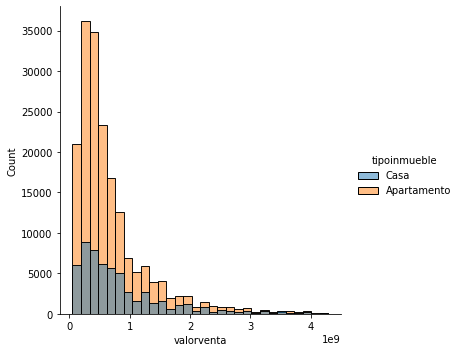

In [10]:
sns.displot(x='valorventa',hue='tipoinmueble',data=train,bins=30)

Se observa que los valores se concentran alrededor de 0.5e9, es decir, aproximadamente 500 millones de pesos. Además, se observan más apartamentos que casas pero su distribución de valor es aproximadamente igual.

### Área del inmueble

In [11]:
train.area.describe()

count    2.420410e+05
mean     1.667757e+04
std      6.334077e+06
min      0.000000e+00
25%      6.800000e+01
50%      1.040000e+02
75%      1.800000e+02
max      3.003515e+09
Name: area, dtype: float64

Se observan inmuebles con un área de cero y otros con un área de cientos de millones. Eligiremos las variables que tengan un área superior a cero y menor al percentil 99

In [12]:
train = train[(train.area >0)&(train.area< np.percentile(train.area,99))]

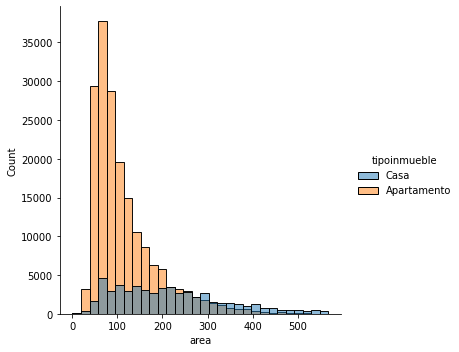

In [13]:
sns.displot(x='area',hue='tipoinmueble',data=train,bins=30)

La gráfica anterior muestra que en general, las casas tienen una distribución del área mayor que los apartamentos.

### Creación de la variable de interés: _valormt2_

Creamos la variable respuesta: _valormt2_ que se define como el ratio entre el valor de la vivienda y los metros

In [14]:
train['valormt2']= train.valorventa/train.area

In [15]:
val['valormt2']= val.valorventa/val.area

In [16]:
train.valormt2.describe()

count    2.387440e+05
mean     5.511472e+06
std      2.425905e+07
min      1.378676e+05
25%      3.603448e+06
50%      4.792000e+06
75%      6.276596e+06
max      3.800000e+09
Name: valormt2, dtype: float64

Tenemos valores que oscilan entre los 500 mil pesos y cientos de millones de pesos. De esta variable excluiremos aquellas inferiores al percentil 99

In [17]:
train = train[train.valormt2< np.percentile(train.valormt2,99)]

Graficamos la variable de interés

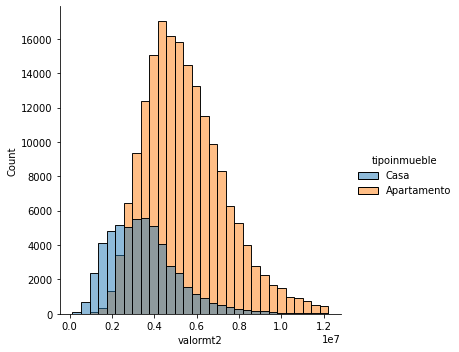

In [18]:
sns.displot(x='valormt2',hue='tipoinmueble',data=train,bins=30)

Se observa claramente que los valores de los apartamentos tiene una distribución acampanada y en media, el valor del metro cuadrado es mayor que el de las casas.

A continuación graficamos el número de columnas y creamos una estrategia de visualización.

In [19]:
train.columns

Index(['id', 'area', 'ascensor', 'balcon', 'banos', 'banoservicio',
       'conjuntocerrado', 'cuartoservicio', 'deposito', 'estrato', 'estudio',
       'garajes', 'gimnasio', 'habitaciones', 'halldealcobas',
       'parqueaderovisitantes', 'piscina', 'piso', 'porteria', 'remodelado',
       'saloncomunal', 'terraza', 'tiempodeconstruido', 'vigilancia', 'vista',
       'zonalavanderia', 'valoradministracion', 'valorventa', 'tipoinmueble',
       'tiponegocio', 'latitud', 'longitud', 'valormt2'],
      dtype='object')

In [20]:
train.shape

(236353, 33)

### ascensor

In [21]:
train.ascensor.describe()

count    236353.000000
mean          0.360977
std           0.480285
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: ascensor, dtype: float64

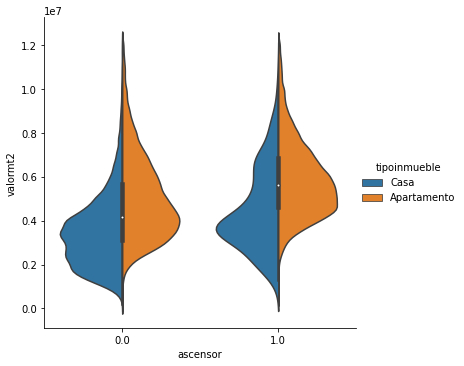

In [22]:
sns.catplot(x="ascensor", y="valormt2", hue="tipoinmueble",
            kind="violin", split=True, data=train)

Se observa que los apartamentos con ascensor son más caros que aquellos que no lo tienen, mientras que las casas se distribuyen de forma parecida.

### balcón

In [23]:
train.balcon.describe()

count    236353.000000
mean          0.245980
std           0.430667
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: balcon, dtype: float64

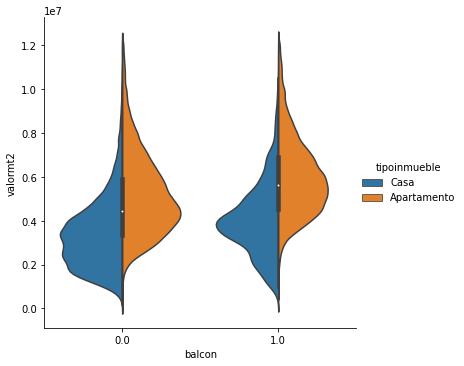

In [24]:
sns.catplot(x="balcon", y="valormt2", hue="tipoinmueble",
            kind="violin", split=True, data=train)

Los apartamentos con balcón valen en promedio más que aquellos que no lo tienen.

### baños

In [25]:
train.banos.describe()

count    236353.000000
mean          2.739804
std           1.644738
min           0.000000
25%           2.000000
50%           2.000000
75%           3.000000
max         253.000000
Name: banos, dtype: float64

Se eliminan los datos atípicos, ya que una casa con 253 baños es muy poco probable.

In [26]:
train = train[train.banos< np.percentile(train.banos,99)]

Ahora observamos los registros por número de baños

In [27]:
train.groupby(['banos'])['id'].count()

banos
0.0     2728
1.0    23908
2.0    91565
3.0    61896
4.0    37680
5.0    15748
Name: id, dtype: int64

Se observa que hay 2728 inmuebles sin baños o con datos faltantes, por lo que eliminamos esos registros.

In [28]:
train = train[train.banos> 0]

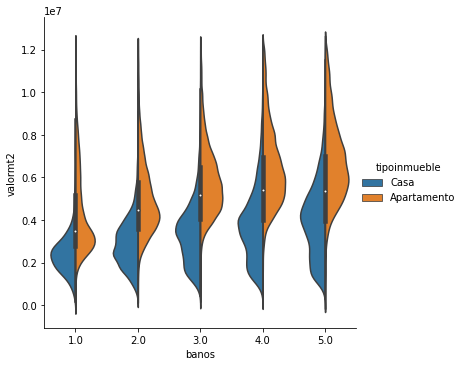

In [29]:
sns.catplot(x="banos", y="valormt2", hue="tipoinmueble",
            kind="violin", split=True, data=train)

Se observa un aumento en el precio de los inmuebles en la medida en que aumenta el número de baños

In [30]:
train.shape

(230797, 33)

### Baño de servicio

In [31]:
train.banoservicio.describe()

count    230797.000000
mean          0.049255
std           0.216401
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: banoservicio, dtype: float64

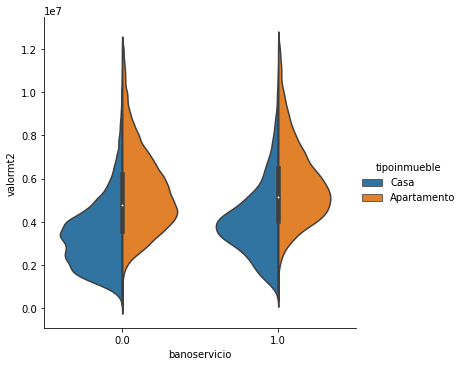

In [32]:
sns.catplot(x='banoservicio', y="valormt2", hue="tipoinmueble",
            kind="violin", split=True, data=train)

El baño de servicio no muestra una gran diferencia en la mediana del valor del metro cuadrado.

### Conjunto cerrado

In [33]:
train.conjuntocerrado.describe()

count    230797.000000
mean          0.327028
std           0.469128
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: conjuntocerrado, dtype: float64

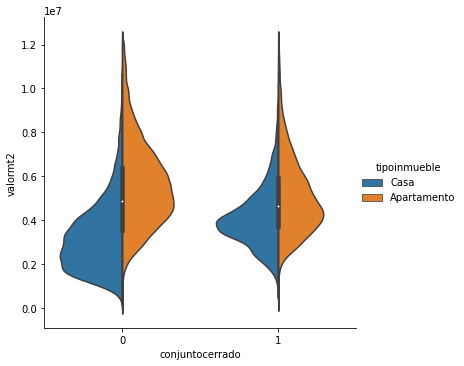

In [34]:
sns.catplot(x='conjuntocerrado', y="valormt2", hue="tipoinmueble",
            kind="violin", split=True, data=train)

### Cuarto de servicio

In [35]:
train.cuartoservicio.describe()

count    230797.000000
mean          0.220583
std           0.414641
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: cuartoservicio, dtype: float64

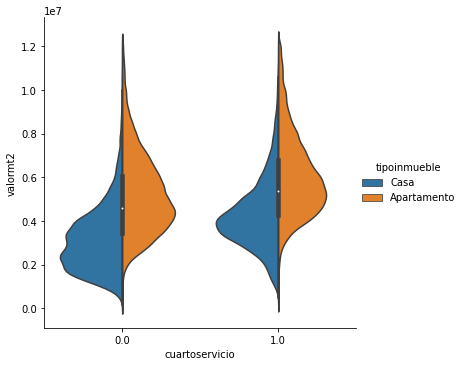

In [36]:
sns.catplot(x='cuartoservicio', y="valormt2", hue="tipoinmueble",
            kind="violin", split=True, data=train)

### Depósito

In [37]:
train.deposito.describe()

count    230797.000000
mean          0.387024
std           0.487070
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: deposito, dtype: float64

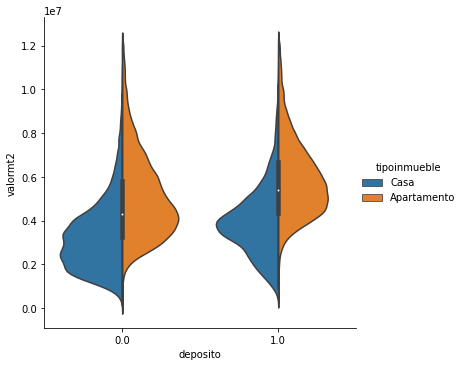

In [38]:
sns.catplot(x='deposito', y="valormt2", hue="tipoinmueble",
            kind="violin", split=True, data=train)

Se observa un pequeño incremento en el valor de aquellos que tienen depósito.

### Estrato

In [39]:
train.estrato.describe()

count    230797.000000
mean          4.259336
std           1.490659
min           0.000000
25%           3.000000
50%           4.000000
75%           6.000000
max           7.000000
Name: estrato, dtype: float64

In [40]:
train.groupby(['estrato'])['id'].count()

estrato
0.0     7174
1.0     1053
2.0    15637
3.0    46255
4.0    54458
5.0    43216
6.0    62990
7.0       14
Name: id, dtype: int64

Eliminamos los estratos 0 y 14

In [41]:
train = train[(train.estrato>0)&(train.estrato<7)]

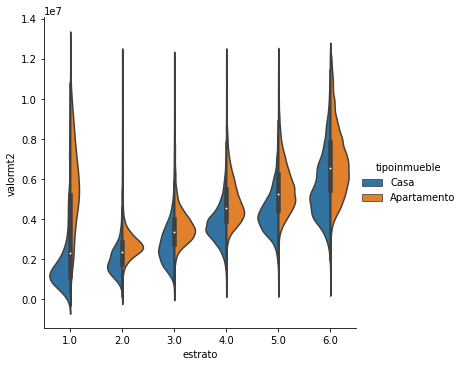

In [42]:
sns.catplot(x='estrato', y="valormt2", hue="tipoinmueble",
            kind="violin", split=True, data=train)

Hay un efecto del estrato en el precio de la vivienda observable en el gráfico, en el estrato 1 se observa un comportamiento diferente.

In [43]:
train.shape

(223609, 33)

### Estudio

In [44]:
train.estudio.describe()

count    223609.000000
mean          0.313588
std           0.463952
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: estudio, dtype: float64

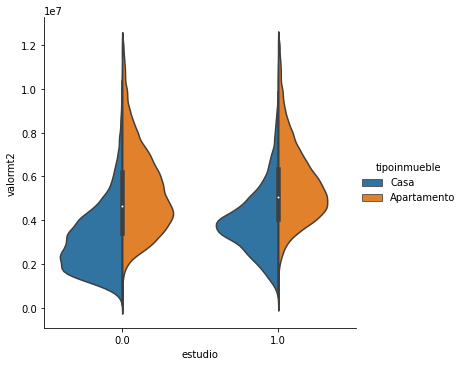

In [45]:
sns.catplot(x='estudio', y="valormt2", hue="tipoinmueble",
            kind="violin", split=True, data=train)

### Garajes

In [46]:
train.garajes.describe()

count    223609.000000
mean          1.519809
std           1.042813
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          10.000000
Name: garajes, dtype: float64

Una casa con 10 garajes no es tan probable, por lo que filtraremos aquellas que estén por debajo del percentil 99

In [47]:
train= train[train.garajes< np.percentile(train.garajes,99)]

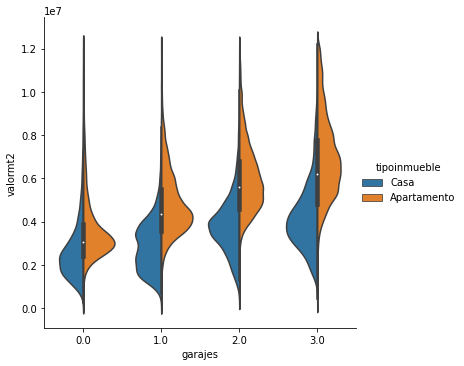

In [48]:
sns.catplot(x='garajes', y="valormt2", hue="tipoinmueble",
            kind="violin", split=True, data=train)

Se observa que para los apartamentos el precio varía respecto a la cantidad de garajes, mas no lo hace tanto para las casas.

In [49]:
train.shape

(212291, 33)

### Gimnasio

In [50]:
train.gimnasio.describe()

count    212291.000000
mean          0.222355
std           0.415829
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: gimnasio, dtype: float64

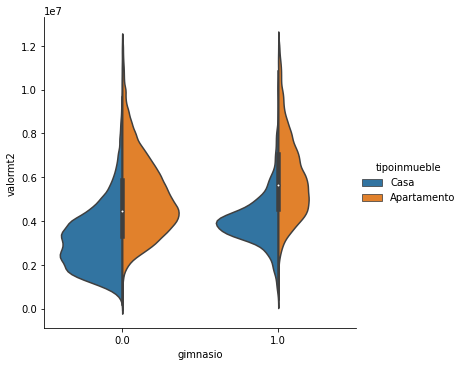

In [51]:
sns.catplot(x='gimnasio', y="valormt2", hue="tipoinmueble",
            kind="violin", split=True, data=train)

### Habitaciones

In [52]:
train.habitaciones.describe()

count    212291.000000
mean          2.945904
std           1.227345
min           0.000000
25%           2.000000
50%           3.000000
75%           3.000000
max          88.000000
Name: habitaciones, dtype: float64

In [53]:
train.groupby('habitaciones')['id'].count()

habitaciones
0.0        607
1.0      15477
2.0      44528
3.0     114246
4.0      22669
5.0       9724
6.0       1868
7.0       1033
8.0        885
9.0        492
10.0       403
11.0       153
12.0        92
13.0        29
14.0        30
15.0        18
16.0         9
17.0         1
18.0         2
19.0         2
20.0         3
22.0         1
23.0         3
30.0         4
32.0         3
33.0         2
34.0         2
35.0         1
40.0         2
52.0         1
88.0         1
Name: id, dtype: int64

Se observan habitacines de cero y de 88, las cuales eliminaremos del análisis.

In [54]:
train =train[(train.habitaciones>0) &(train.habitaciones< np.percentile(train.habitaciones,99))]

In [55]:
train.groupby('habitaciones')['id'].count()

habitaciones
1.0     15477
2.0     44528
3.0    114246
4.0     22669
5.0      9724
6.0      1868
7.0      1033
Name: id, dtype: int64

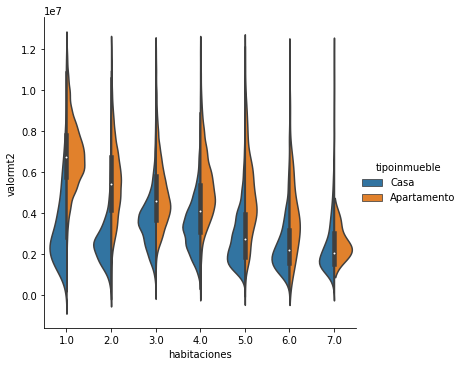

In [56]:
sns.catplot(x='habitaciones', y="valormt2", hue="tipoinmueble",
            kind="violin", split=True, data=train)

In [57]:
train.shape

(209545, 33)

### Hall de alcobas

In [58]:
train.halldealcobas.describe()

count    209545.000000
mean          0.262965
std           0.440245
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: halldealcobas, dtype: float64

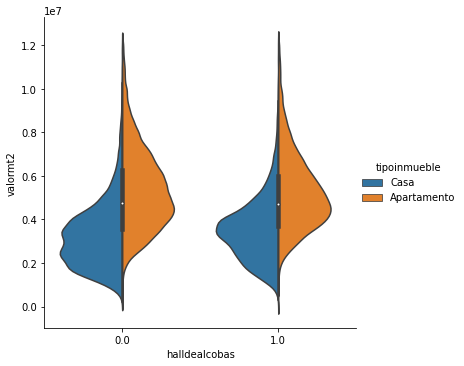

In [59]:
sns.catplot(x='halldealcobas', y="valormt2", hue="tipoinmueble",
            kind="violin", split=True, data=train)

### parqueadero visitantes

In [60]:
train.parqueaderovisitantes.describe()

count    209545.000000
mean          0.247837
std           0.431758
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: parqueaderovisitantes, dtype: float64

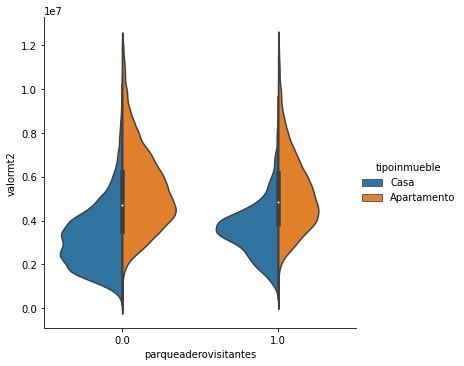

In [61]:
sns.catplot(x='parqueaderovisitantes', y="valormt2", hue="tipoinmueble",
            kind="violin", split=True, data=train)

### piscina

In [62]:
train.piscina.describe()

count    209545.000000
mean          0.068620
std           0.252808
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: piscina, dtype: float64

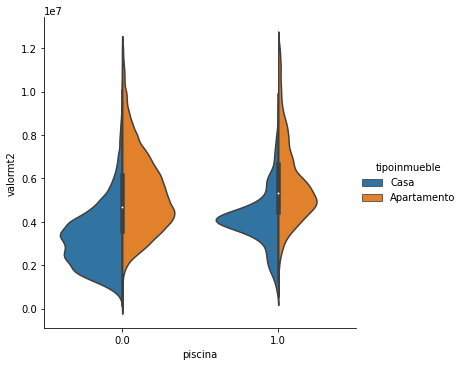

In [63]:
sns.catplot(x='piscina', y="valormt2", hue="tipoinmueble",
            kind="violin", split=True, data=train)

Se observa que aproximadamente un 7\% de los inmuebles tienen piscina.

### Piso

In [64]:
train.piso.describe()

count    209545.000000
mean          2.326970
std           3.168386
min           0.000000
25%           0.000000
50%           1.000000
75%           4.000000
max          30.000000
Name: piso, dtype: float64

In [65]:
train.groupby(['piso'])['id'].count()

piso
0.0     99161
1.0     11493
2.0     20901
3.0     20477
4.0     15883
5.0     14548
6.0      8081
7.0      4847
8.0      3487
9.0      2448
10.0     1826
11.0     1657
12.0     1573
13.0      810
14.0      612
15.0      546
16.0      548
17.0      193
18.0      103
19.0       72
20.0       82
21.0       44
22.0       39
23.0       27
24.0       11
25.0       15
26.0       24
27.0       19
28.0        8
29.0        1
30.0        9
Name: id, dtype: int64

Eliminamos aquellos pisos por encima del 99%

In [66]:
train = train[train.piso < np.percentile(train.piso,99)]

In [67]:
train.groupby(['piso'])['id'].count()

piso
0.0     99161
1.0     11493
2.0     20901
3.0     20477
4.0     15883
5.0     14548
6.0      8081
7.0      4847
8.0      3487
9.0      2448
10.0     1826
11.0     1657
12.0     1573
13.0      810
Name: id, dtype: int64

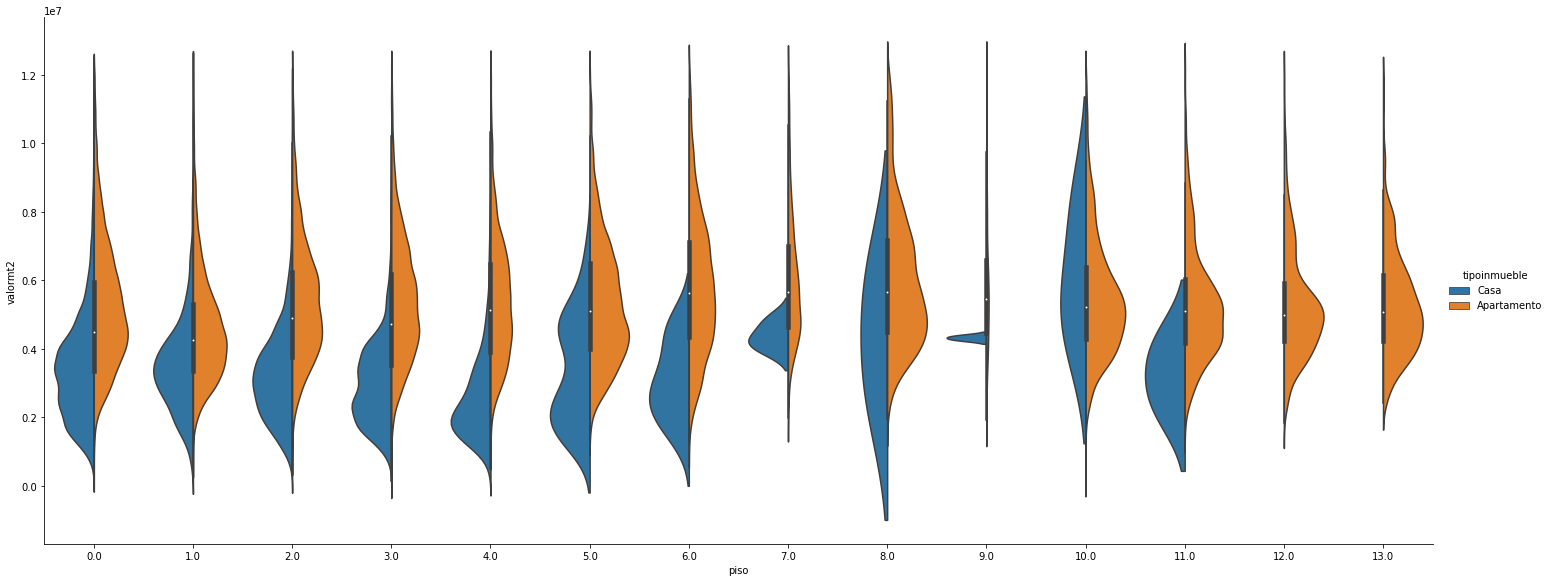

In [68]:
sns.catplot(x='piso', y="valormt2", hue="tipoinmueble",
            kind="violin", split=True, data=train,height=8, aspect=15/6)

¿Es correcto tener una casa en un piso superior al primero?

### Portería

In [69]:
train.porteria.describe()

count    207192.000000
mean          0.068960
std           0.253387
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: porteria, dtype: float64

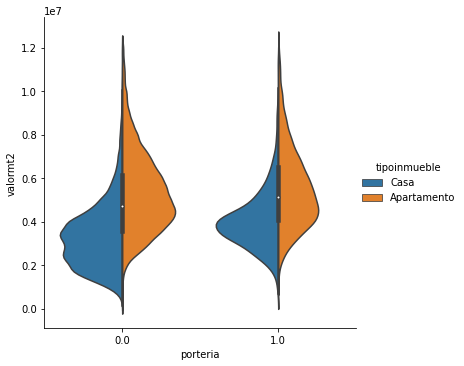

In [70]:
sns.catplot(x='porteria', y="valormt2", hue="tipoinmueble",
            kind="violin", split=True, data=train)

### Remodelado

In [71]:
train.remodelado.describe()

count    207192.000000
mean          0.097813
std           0.297062
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: remodelado, dtype: float64

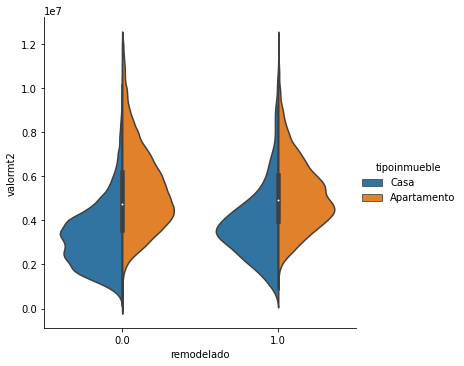

In [72]:
sns.catplot(x='remodelado', y="valormt2", hue="tipoinmueble",
            kind="violin", split=True, data=train)

### Salón comunal

In [73]:
train.saloncomunal.describe()

count    207192.000000
mean          0.463512
std           0.498668
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: saloncomunal, dtype: float64

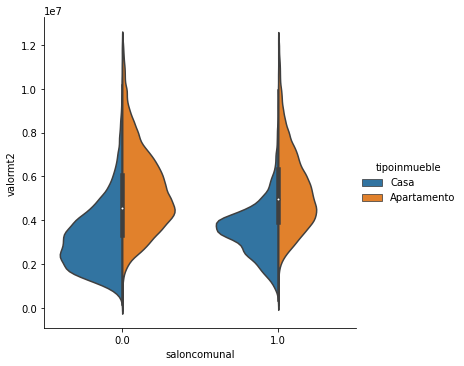

In [74]:
sns.catplot(x='saloncomunal', y="valormt2", hue="tipoinmueble",
            kind="violin", split=True, data=train)

### Terraza

In [75]:
train.terraza.describe()

count    207192.000000
mean          0.164109
std           0.370375
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: terraza, dtype: float64

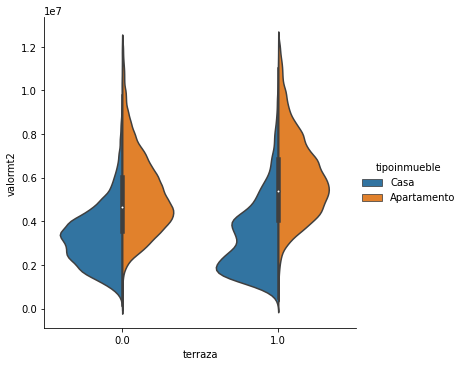

In [76]:
sns.catplot(x='terraza', y="valormt2", hue="tipoinmueble",
            kind="violin", split=True, data=train)

Se observa una distribución bimodal en las casas que tienen terraza, una pregunta interesante sería saber qué hace que el precio cambie.

### Tiempo de construido

Hay un dato con una codificación mal ingresada

In [77]:
train.tiempodeconstruido.unique()

array([0, '16 a 30 años', 'Más de 30 años', '1 a 8 años',
       'Menos de 1 año', '9 a 15 años', 'Entre 10 y 20 años',
       'Más de 20 años', 'Entre 5 y 10 años', 'Entre 0 y 5 años',
       'Remodelado', 'ntre 0 y 5 años'], dtype=object)

In [78]:
train.groupby(['tiempodeconstruido'])['id'].count()

tiempodeconstruido
0                     50712
1 a 8 años            22527
16 a 30 años          25309
9 a 15 años           19810
Entre 0 y 5 años      17235
Entre 10 y 20 años    29858
Entre 5 y 10 años     14107
Menos de 1 año         3864
Más de 20 años        13067
Más de 30 años         9484
Remodelado             1212
ntre 0 y 5 años           7
Name: id, dtype: int64

Está el datos 0 que significa NA, y un dato que dice _ntre 0 y 5 años_

In [79]:
train.tiempodeconstruido = np.where(train.tiempodeconstruido==0,"Ausente",train.tiempodeconstruido)

c:\users\predator\appdata\local\programs\python\python38\lib\site-packages\pandas\core\generic.py:5489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [80]:
train.groupby(['tiempodeconstruido'])['id'].count()

tiempodeconstruido
1 a 8 años            22527
16 a 30 años          25309
9 a 15 años           19810
Ausente               50712
Entre 0 y 5 años      17235
Entre 10 y 20 años    29858
Entre 5 y 10 años     14107
Menos de 1 año         3864
Más de 20 años        13067
Más de 30 años         9484
Remodelado             1212
ntre 0 y 5 años           7
Name: id, dtype: int64

Esta variable debe cambiarse tantro en train como en val

In [81]:
train['tiempodeconstruido'] =train['tiempodeconstruido'].str.\
    replace('ntre 0 y 5 años','Entre 0 y 5 años').str.replace('EEE','E').str.\
    replace('EE','E').str.replace('ñ','n').str.replace('á','a')
val['tiempodeconstruido'] =val['tiempodeconstruido'].str.\
    replace('ntre 0 y 5 años','Entre 0 y 5 años').str.replace('EEE','E').str.\
    replace('EE','E').str.replace('ñ','n').str.replace('á','a')

<ipython-input-81-5d9045b277a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['tiempodeconstruido'] =train['tiempodeconstruido'].str.\


In [82]:
train.groupby(['tiempodeconstruido'])['id'].count()

tiempodeconstruido
1 a 8 anos            22527
16 a 30 anos          25309
9 a 15 anos           19810
Ausente               50712
Entre 0 y 5 anos      17242
Entre 10 y 20 anos    29858
Entre 5 y 10 anos     14107
Mas de 20 anos        13067
Mas de 30 anos         9484
Menos de 1 ano         3864
Remodelado             1212
Name: id, dtype: int64

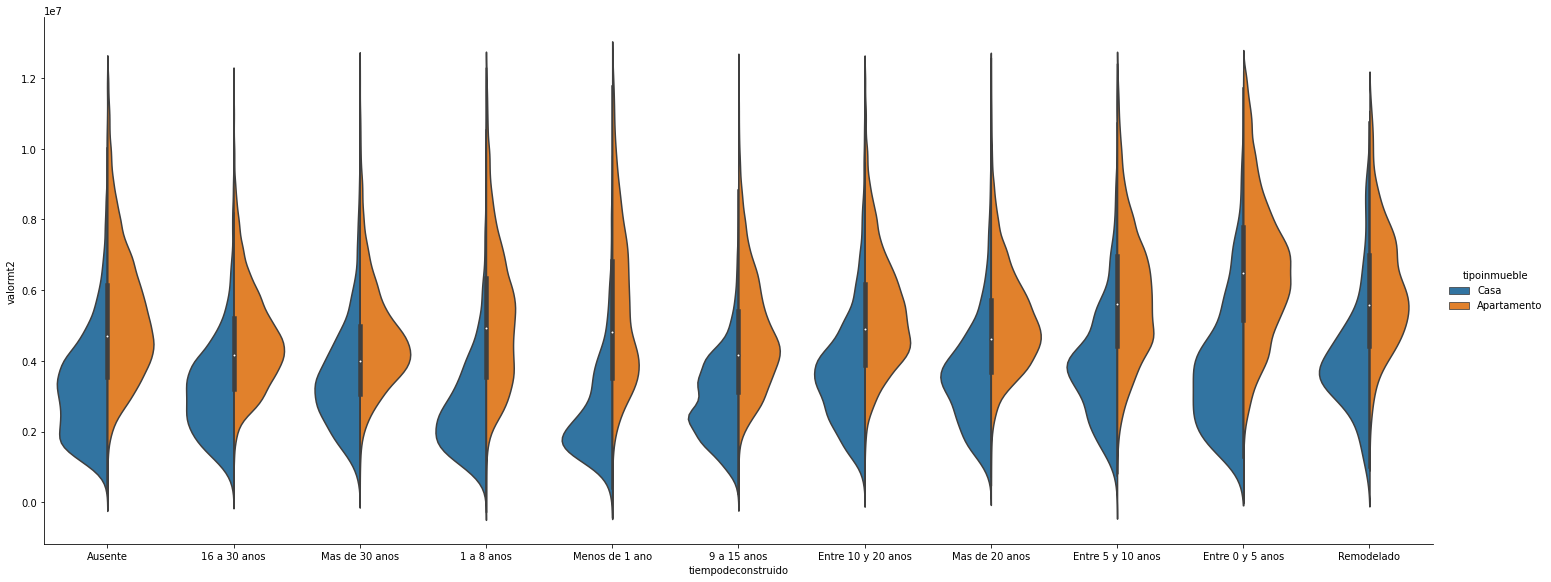

In [83]:
sns.catplot(x='tiempodeconstruido', y="valormt2", hue="tipoinmueble",
            kind="violin", split=True, data=train,height=8, aspect=15/6)

Al parecer el tiempo de construcción no varía

### Vigilancia

In [84]:
train.vigilancia.describe()

count    207192.000000
mean          0.566214
std           0.495598
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: vigilancia, dtype: float64

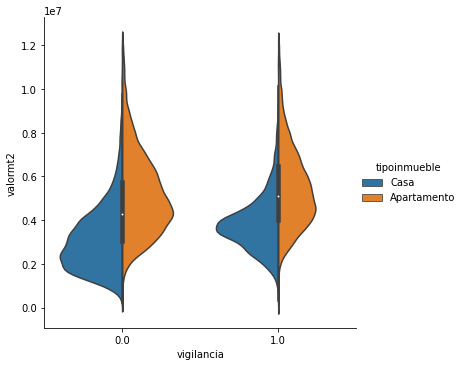

In [85]:
sns.catplot(x='vigilancia', y="valormt2", hue="tipoinmueble",
            kind="violin", split=True, data=train)

### Vista

In [86]:
train.vista.unique()

array(['Exterior', 0, 'Interior'], dtype=object)

In [87]:
train.groupby(['vista'])['id'].count()

vista
0           117694
Exterior     69092
Interior     20406
Name: id, dtype: int64

In [88]:
train.vista = np.where(train.vista==0,"Ausente",train.vista)

c:\users\predator\appdata\local\programs\python\python38\lib\site-packages\pandas\core\generic.py:5489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [89]:
val.vista = np.where(val.vista==0,"Ausente",val.vista)

In [90]:
train.groupby(['vista'])['id'].count()

vista
Ausente     117694
Exterior     69092
Interior     20406
Name: id, dtype: int64

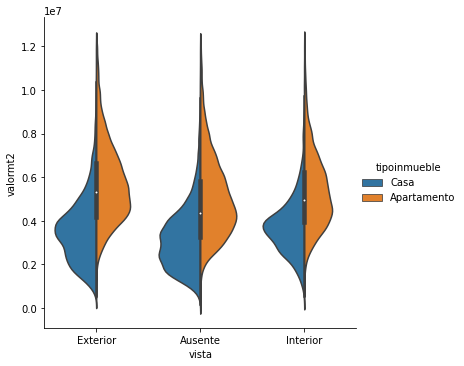

In [91]:
sns.catplot(x='vista', y="valormt2", hue="tipoinmueble",
            kind="violin", split=True, data=train)

### Zona lavandería

In [92]:
train.zonalavanderia.describe()

count    207192.000000
mean          0.608783
std           0.488024
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: zonalavanderia, dtype: float64

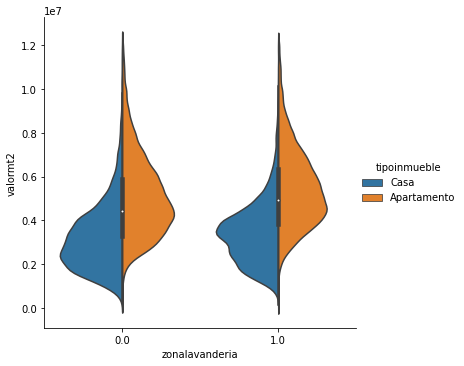

In [93]:
sns.catplot(x='zonalavanderia', y="valormt2", hue="tipoinmueble",
            kind="violin", split=True, data=train)

### valor administracion

In [94]:
train.valoradministracion.describe()

count    2.071920e+05
mean     1.668878e+06
std      3.167777e+07
min      0.000000e+00
25%      0.000000e+00
50%      2.400000e+05
75%      5.170000e+05
max      2.200000e+09
Name: valoradministracion, dtype: float64

<AxesSubplot:xlabel='valoradministracion', ylabel='valormt2'>

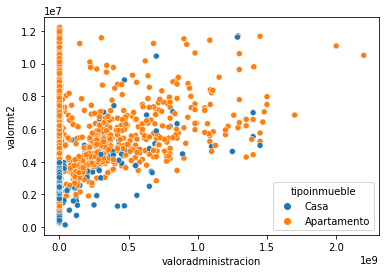

In [95]:
sns.scatterplot(x='valoradministracion',y='valormt2',hue='tipoinmueble',data=train)

Se observa que generalmente, entre más valore de administración, más vale el apartamente, aparte, en promedio vale más el metro cuadrado de apartamentos con administración que casas con administración

### tipo negocio

In [96]:
train.tiponegocio.unique()

array(['Venta', 'Venta y arriendo', 'Venta Y Arriendo', 'Arriendo', 0],
      dtype=object)

In [97]:
train.groupby(['tiponegocio'])['id'].count()

tiponegocio
0                      722
Arriendo               374
Venta               197509
Venta Y Arriendo      1512
Venta y arriendo      7075
Name: id, dtype: int64

In [98]:
train.tiponegocio = np.where(train.tiponegocio=="Venta y arriendo",'Venta Y Arriendo',train.tiponegocio)

c:\users\predator\appdata\local\programs\python\python38\lib\site-packages\pandas\core\generic.py:5489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


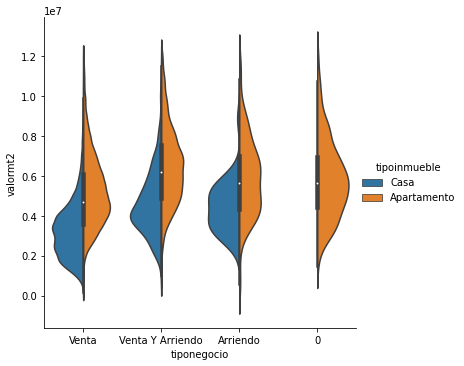

In [99]:
sns.catplot(x='tiponegocio', y="valormt2", hue="tipoinmueble",
            kind="violin", split=True, data=train)

In [100]:
train.groupby(['tiponegocio'])['id'].count()

tiponegocio
0                      722
Arriendo               374
Venta               197509
Venta Y Arriendo      8587
Name: id, dtype: int64

### Coordenadas espaciales

In [101]:
train[['longitud','latitud']].describe()

,longitud,latitud
count,207192.000000,207192.000000
mean,-74.072479,4.686723
std,0.038447,0.047851
min,-74.362167,3.890660
25%,-74.091133,4.658086
50%,-74.058670,4.695669
75%,-74.045144,4.720298
max,-73.990173,4.834706


In [102]:
# https://towardsdatascience.com/easy-steps-to-plot-geographic-data-on-a-map-python-11217859a2db
# https://medium.com/@abuqassim115/thanks-for-your-response-frank-fb869824ede2
BBox = (train.longitud.min(),   train.longitud.max(),      
         train.latitud.min(), train.latitud.max())

In [103]:
ruh_m = plt.imread('map.png')

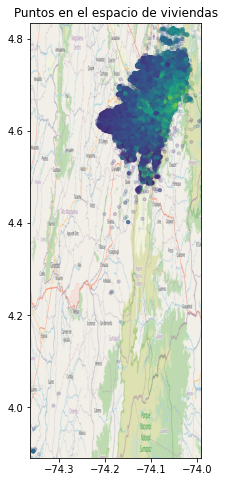

In [104]:
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(train.longitud, train.latitud, zorder=1, alpha= 0.2, c=train.valormt2, s=10)
ax.set_title('Puntos en el espacio de viviendas')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

Restringimos el área a latitudes mayores a 4.4 y longitudes menores a -74.25

In [105]:
train=train[train.latitud>=4.4]
train= train[train.longitud>=-74.25]

In [106]:
BBox = (train.longitud.min(),   train.longitud.max(),      
         train.latitud.min(), train.latitud.max());BBox

(-74.2167663574, -73.9901733398, 4.4023599625, 4.8347060755)

In [107]:
ruh_m = plt.imread('map2.png')

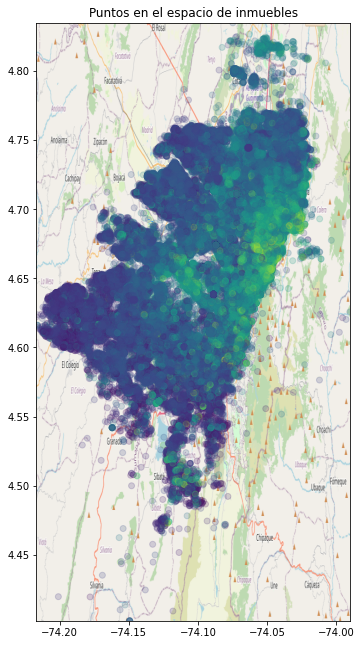

In [108]:
fig, ax = plt.subplots(figsize = (8,11))
ax.scatter(train.longitud, train.latitud, zorder=1, alpha= 0.2, c=train.valormt2)
ax.set_title('Puntos en el espacio de inmuebles')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

Se puede observar una zona donde los inmuebles son más costosos (los más coloridos).

## Transformación de variables categóricas mediante one hot encoding

In [109]:
def one_hot_enc_prep(train,val):
    train['categ'] = 'train'
    val['categ'] = 'val'
    bd_concat = train.append(val)
    bd_concat_dum = pd.get_dummies(bd_concat,drop_first=True)
    bd_concat_dum.columns=bd_concat_dum.columns.str.replace('\s+', '_')
    train_dum = bd_concat_dum[bd_concat_dum.categ_val==0]
    train_dum = train_dum.drop('categ_val',1)
    val_dum = bd_concat_dum[bd_concat_dum.categ_val==1]
    val_dum = val_dum.drop('categ_val',1)
    train_dum = train_dum.drop('id',1)
    val_dum = val_dum.drop('id',1)
    return train_dum,val_dum

In [110]:
train_dum, val_dum = one_hot_enc_prep(train,val)

## Partición de entrenamiento y test

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X_train, X_test, y_train, y_test = train_test_split(train_dum.drop('valormt2',1), 
                                                    train_dum.valormt2, test_size=0.15,
                                                    random_state=3)
print(X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(176081, 43) (176081,)
(31074, 43) (31074,)


## Reducción de dimensionalidad con Random Forest

In [113]:
from sklearn.ensemble import RandomForestRegressor

In [114]:
rf = RandomForestRegressor(n_jobs=3,random_state=1)

In [115]:
model_red_dim= rf.fit(X_train,y_train)

In [116]:
Imporancia_variables=pd.DataFrame({'Variable': X_train.columns,
                                   'Importancia': rf.feature_importances_}).\
    sort_values(by=['Importancia'],ascending=False).reset_index().drop('index',1)

In [117]:
Imporancia_variables.head(12)

,Variable,Importancia
0,estrato,0.412551
1,valorventa,0.214941
2,area,0.180613
3,latitud,0.075381
4,habitaciones,0.052781
5,longitud,0.021972
6,valoradministracion,0.019553
7,tiempodeconstruido_Entre_0_y_5_anos,0.010534
8,tipoinmueble_Casa,0.010028
9,gimnasio,0.000325


<AxesSubplot:ylabel='Importancia'>

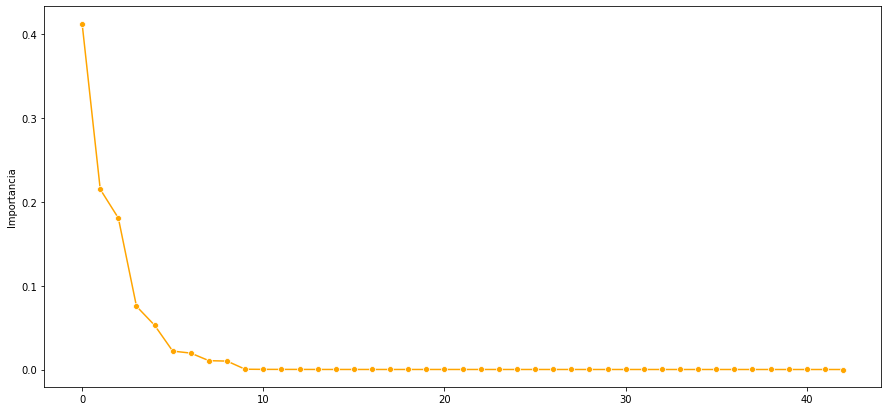

In [118]:
plt.figure(figsize=(15,7))
sns.lineplot(y='Importancia', x= Imporancia_variables.index,data=Imporancia_variables,marker="o", color='orange')

Utilizamos las primeras nueve variables para el modelo.

In [119]:
n=len(Imporancia_variables)
#n=10
variables= Imporancia_variables.Variable[0:n]

In [120]:
variables

0                                   estrato
1                                valorventa
2                                      area
3                                   latitud
4                              habitaciones
5                                  longitud
6                       valoradministracion
7       tiempodeconstruido_Entre_0_y_5_anos
8                         tipoinmueble_Casa
9                                  gimnasio
10                                     piso
11                                    banos
12                                  garajes
13                               vigilancia
14                           vista_Exterior
15                           zonalavanderia
16                             saloncomunal
17                                   balcon
18                                 deposito
19                                  terraza
20                           cuartoservicio
21                                 ascensor
22                          conj

## Modelo inicial propuesto XgBoost

### Entrenamiento del modelo

In [121]:
import xgboost as xgb

In [122]:
dtrain=xgb.DMatrix(X_train[variables], label=y_train)
dtest=xgb.DMatrix(X_test[variables], label=y_test)
deval = xgb.DMatrix(val_dum.drop(["valormt2"], 1)[variables],label=val_dum["valormt2"])

In [123]:
parametros = {"booster":"gbtree", "max_depth": 4, "eta": 0.22, "objective": "reg:gamma", "nthread":5,"gamma":10,
             'seed':4}
rondas = 1200

In [124]:
evallist = [(dtest, 'eval'), (dtrain, 'train')]

In [125]:
modelo = xgb.train(parametros, dtrain, rondas,evallist, early_stopping_rounds=20)

[0]	eval-gamma-nloglik:8003109.50000	train-gamma-nloglik:8013446.50000
[1]	eval-gamma-nloglik:6422643.00000	train-gamma-nloglik:6430904.50000
[2]	eval-gamma-nloglik:5154292.50000	train-gamma-nloglik:5160918.50000
[3]	eval-gamma-nloglik:4136409.50000	train-gamma-nloglik:4141720.00000
[4]	eval-gamma-nloglik:3319552.75000	train-gamma-nloglik:3323805.75000
[5]	eval-gamma-nloglik:2663998.75000	train-gamma-nloglik:2667430.25000
[6]	eval-gamma-nloglik:2137912.00000	train-gamma-nloglik:2140663.75000
[7]	eval-gamma-nloglik:1715704.87500	train-gamma-nloglik:1717912.37500
[8]	eval-gamma-nloglik:1376896.50000	train-gamma-nloglik:1378671.25000
[9]	eval-gamma-nloglik:1104985.75000	train-gamma-nloglik:1106407.37500
[10]	eval-gamma-nloglik:886772.37500	train-gamma-nloglik:887907.37500
[11]	eval-gamma-nloglik:711652.37500	train-gamma-nloglik:712563.75000
[12]	eval-gamma-nloglik:571115.68750	train-gamma-nloglik:571848.75000
[13]	eval-gamma-nloglik:458331.28125	train-gamma-nloglik:458917.62500
[14]	eval-

[127]	eval-gamma-nloglik:16.34060	train-gamma-nloglik:16.34232
[128]	eval-gamma-nloglik:16.34060	train-gamma-nloglik:16.34232
[129]	eval-gamma-nloglik:16.34060	train-gamma-nloglik:16.34232
[130]	eval-gamma-nloglik:16.34060	train-gamma-nloglik:16.34232
[131]	eval-gamma-nloglik:16.34060	train-gamma-nloglik:16.34232
[132]	eval-gamma-nloglik:16.34060	train-gamma-nloglik:16.34232


In [126]:
submission_xgb=pd.DataFrame( {'id':val.id ,'valormt2_predicted':modelo.predict(deval)})
submission_xgb.to_csv('submission_xgb.csv',index=False)

### Rendimiento del modelo

<AxesSubplot:xlabel='valormt2'>

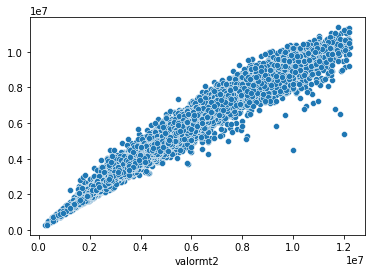

In [127]:
sns.scatterplot(y=modelo.predict(dtest),x=y_test)

<AxesSubplot:xlabel='valormt2'>

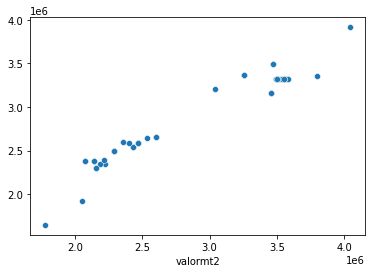

In [128]:
sns.scatterplot(y=modelo.predict(deval),x=val.valormt2)

In [129]:
pd.options.display.float_format = '{:.2f}'.format
datos_predichos=pd.DataFrame( {'id':val.id ,'valormt2_predicted':modelo.predict(deval),
                               'real':val.valormt2})
datos_predichos.head(25)

,id,valormt2_predicted,real
0,877392,1647256.88,1778846.15
1,201483,3160054.25,3458333.33
2,188674,3160054.25,3458333.33
3,1211067,3325393.00,3579310.34
4,883437,3325393.00,3565517.24
5,332550,3325393.00,3551655.17
6,320585,3325393.00,3517241.38
7,776969,3325393.00,3586206.90
8,435344,1921507.00,2047619.05
9,1274573,3325393.00,3554794.52


In [130]:
#print('Error cuadrático medio: ', str(np.mean((datos_predichos.real.values-datos_predichos.valormt2_predicted.values)**2)))
print('Error absoluto medio: ', str(np.sqrt(np.mean((datos_predichos.real.values-datos_predichos.valormt2_predicted.values)**2))))

Error absoluto medio:  191252.93096255898


In [131]:
#datos_predichos.valormt2_predicted/datos_predichos.real

## Entendimiento del modelo

https://machinelearningmastery.com/visualize-gradient-boosting-decision-trees-xgboost-python/

In [132]:
os.environ['PATH'] =os.environ['PATH']+';'+'C:\\Program Files\\Graphviz\\bin'

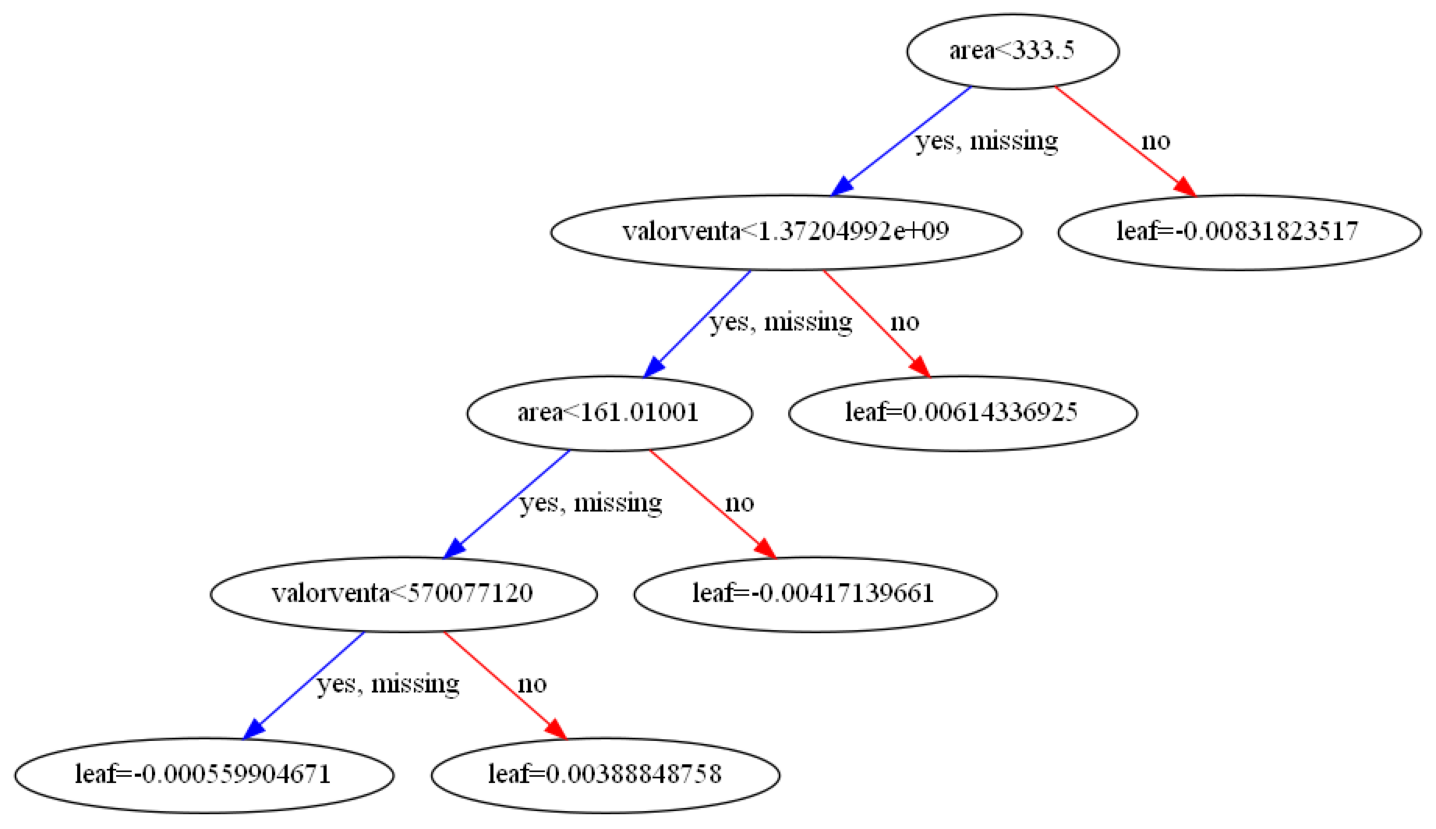

In [133]:
xgb.plot_tree(modelo, num_trees=111)
fig = plt.gcf()
fig.set_size_inches(30, 15)

In [134]:
import treeplot

[treeplot] >Set path in environment.
[treeplot] >Best detected tree: 113


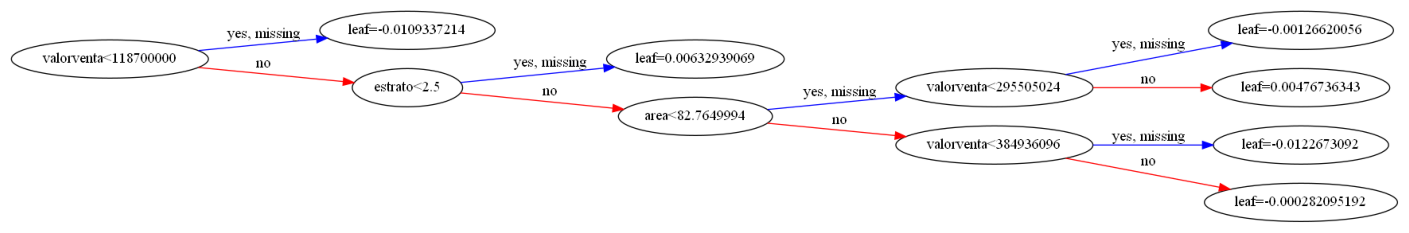

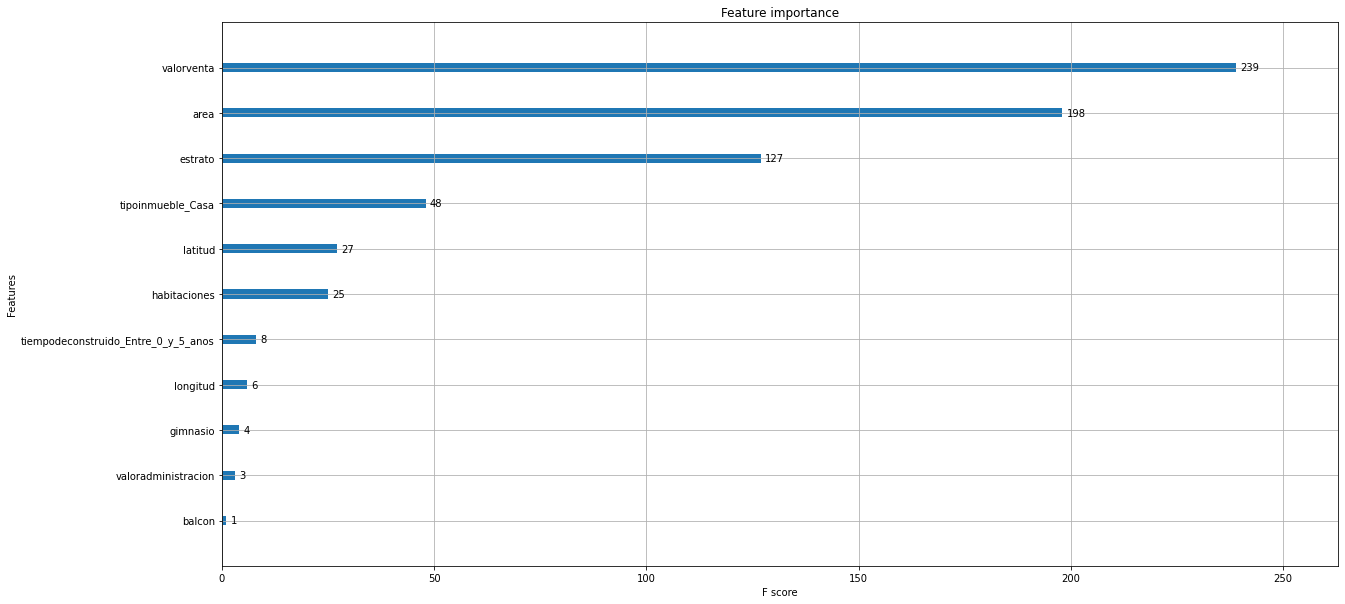

In [135]:
ax = treeplot.xgboost(modelo, plottype='vertical')
fig = plt.gcf()
fig.set_size_inches(20, 10)

## Modelo propuesto para ajustar estimaciones

In [136]:
def optimal_threshold(y_test, y_proba, op_th=None):
  y_th = np.zeros(len(y_test))
  N = 500
  f1_score = np.zeros(N)
  th = np.zeros(N)
  plt.figure(figsize=(12,8))

  for i, t in enumerate(np.linspace(0,1,N)):
    y_true = y_test 
    y_pred_t = (y_proba > t)*1 
    f1_score[i] = metrics.f1_score(y_true , y_pred_t, pos_label=0)
    th[i] = t
  plt.plot(th, f1_score, label = '0')

  for i, t in enumerate(np.linspace(0,1,N)):
    y_true = y_test 
    y_pred_t = (y_proba > t)*1 
    f1_score[i] = metrics.f1_score(y_true , y_pred_t, pos_label=1)
    th[i] = t
  plt.plot(th, f1_score, label = '1')    

  if op_th != None:
    op_th = op_th
  elif op_th == None:
    op_th = th[np.argmax(f1_score)]
    op_f1 = np.max(f1_score)


  plt.plot([op_th, op_th], [0, 1], color = 'r', label = f'Optimal Threshold = {round(op_th, 2)}')

  plt.title('F1_score by Threshold')
  plt.ylabel('F1_score')
  plt.xlabel('Threshold')
  plt.legend()
  y_th[(y_proba > op_th)] = 1
  y_th[(y_proba<= op_th)] = 0

  return op_th

¿Cuáles va a sobre estimar y cuáles a sub-estimar?

In [137]:
y_train_cat = np.where(modelo.predict(dtrain)>y_train,1,0)

In [138]:
y_test_cat = np.where(modelo.predict(dtest)>y_test,1,0)

In [139]:
y_val_cat = np.where(modelo.predict(deval)>val.valormt2,1,0)

In [140]:
dtrain_cat = xgb.DMatrix(X_train[variables], label=y_train_cat)
dtest_cat = xgb.DMatrix(X_test[variables], label=y_test_cat)
deval_cat = xgb.DMatrix(val_dum.drop(["valormt2"], 1)[variables],label=y_val_cat)

In [141]:
parametros_cat = {"booster":"gbtree", "max_depth": 4, "eta": 0.22, "objective": "binary:logistic", "nthread":5,"gamma":10,
             'seed':4}
rondas = 1200

In [142]:
evallist_cat = [(dtest_cat, 'eval'), (dtrain_cat, 'train')]

In [143]:
modelo_cat = xgb.train(parametros_cat, dtrain_cat, rondas,evallist_cat, early_stopping_rounds=20,verbose_eval=False)

[06:29:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


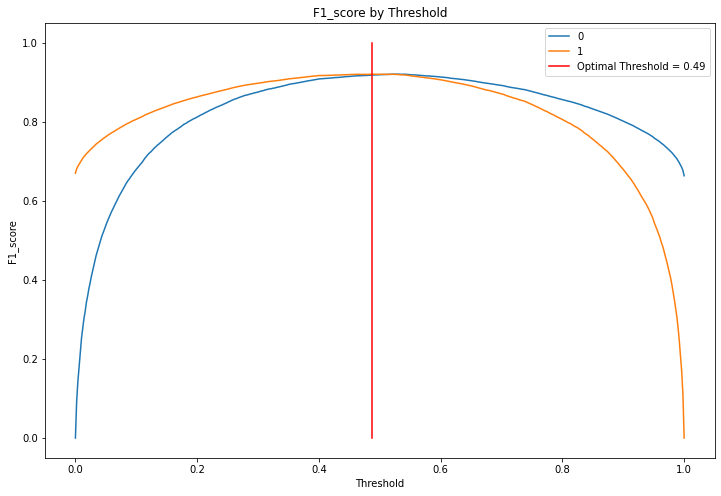

In [144]:
a=optimal_threshold(y_test_cat,modelo_cat.predict(dtest_cat))

In [145]:
a

0.48697394789579157

Utilizamos como punto de corte 0.47

In [146]:
datos_predichos['sub_sob']= np.where(modelo_cat.predict(deval_cat)>a,1,0)

In [147]:
print('la media de unos es: ',np.mean(datos_predichos.valormt2_predicted[datos_predichos.sub_sob==1]/\
                              datos_predichos.real[datos_predichos.sub_sob==1]))
print('la media de ceros es: ',np.mean(datos_predichos.valormt2_predicted[datos_predichos.sub_sob==0]/\
                              datos_predichos.real[datos_predichos.sub_sob==0]))
print('la mediana de unos es: ',np.median(datos_predichos.valormt2_predicted[datos_predichos.sub_sob==1]/\
                              datos_predichos.real[datos_predichos.sub_sob==1]))
print('la mediana de ceros es: ',np.median(datos_predichos.valormt2_predicted[datos_predichos.sub_sob==0]/\
                              datos_predichos.real[datos_predichos.sub_sob==0]))

la media de unos es:  1.0647203663667322
la media de ceros es:  0.9348322489827816
la mediana de unos es:  1.050316114864865
la mediana de ceros es:  0.9358804445633586


In [148]:
sob=np.mean(datos_predichos.valormt2_predicted[datos_predichos.sub_sob==1]/\
                              datos_predichos.real[datos_predichos.sub_sob==1])
sub=np.mean(datos_predichos.valormt2_predicted[datos_predichos.sub_sob==0]/\
                              datos_predichos.real[datos_predichos.sub_sob==0])

In [149]:
datos_predichos.valormt2_predicted = np.where(datos_predichos.sub_sob==0,datos_predichos.valormt2_predicted*sob,
                                             datos_predichos.valormt2_predicted*sub)

In [150]:
print('Error absoluto medio: ', str(np.sqrt(np.mean((datos_predichos.real.values-datos_predichos.valormt2_predicted.values)**2))))

Error absoluto medio:  80465.33741713333


<AxesSubplot:xlabel='real', ylabel='valormt2_predicted'>

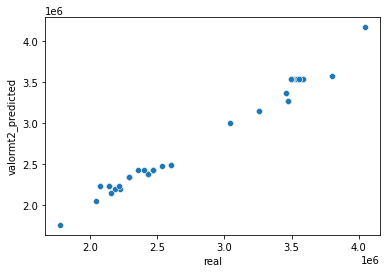

In [151]:
sns.scatterplot(y=datos_predichos.valormt2_predicted,x=datos_predichos.real)

### Manejo de descuento

In [152]:
np.round(0.3568,2)

0.36

In [153]:
def descuento(start,stop,step):
    minimo = []
    for i in np.arange(start=start, stop=stop, step=step):
        val=np.sqrt(np.mean((datos_predichos.real.values-datos_predichos.valormt2_predicted.values*i)**2))
        minimo.append([i,val])
    data= pd.DataFrame(minimo)
    data.columns = ['Ponderador','Error cuadrático']
    data.Ponderador =  np.round(data.Ponderador,2)
    sns.pointplot(x='Ponderador',y='Error cuadrático',data=data)
    return data

,Ponderador,Error cuadrático
0,0.90,314105.50
1,0.91,286730.65
2,0.92,259563.40
3,0.93,232676.46
4,0.94,206179.37
5,0.95,180244.22
6,0.96,155152.98
7,0.97,131389.93
8,0.98,109821.03
9,0.99,92002.43


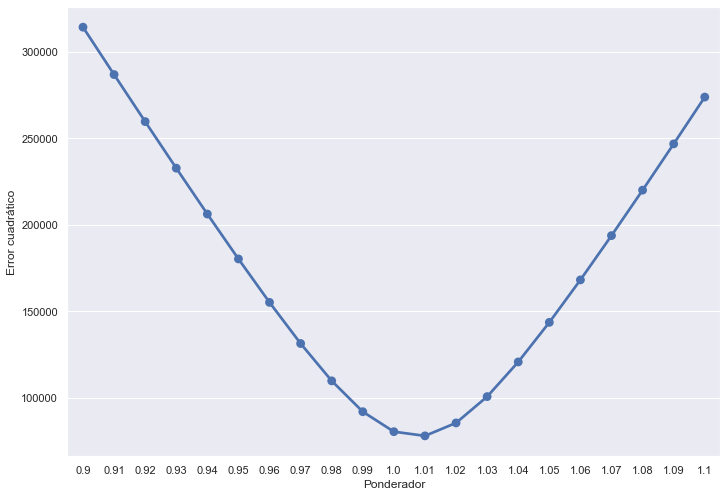

In [154]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
pd.DataFrame(descuento(start=0.9, stop=1.1, step=0.01))

In [155]:
submission_xgb_adj=pd.DataFrame( {'id':val.id ,'valormt2_predicted':datos_predichos.valormt2_predicted*0.97})
submission_xgb_adj.to_csv('submission_xgb_adj.csv',index=False)

## Modelo de ensamble Catboost

In [156]:
import catboost

In [157]:
#https://catboost.ai/docs/concepts/python-reference_catboostregressor_calc_feature_statistics.html